Here we make sure that if we have two highly correlated variables we correctly estimate the uncertainty in their
estimated values due to their correlation. 

The particulars of the simulation are as follows:

    1) All variables have a variance of 1 and are normally distributed
    2) We simulate a given set of indepenent variabes, each of which is paired with a dependent variable with 
       some specified correlation to the independent variable
    3) The true model simply sums the dependent variables and adds normal noise
    4) We seek to estimate the coefficents of a fit model, including uncertainty

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from janelia_core.stats.regression import grouped_linear_regression_boot_strap
from janelia_core.stats.regression import visualize_boot_strap_results

## Parameters go here

In [194]:
n_indep_vars = 3 # Number of independent variables; each of these will be paired with 
                  # an another confounding "dependent" variable

dep_corr = 0 # Target correlation between each independent variable and it's confound

# Here we list how many samples we get from each group
n_smps = 1000
            
# Here we specify the noise standard deviation - we assume the same noise statistics
# are independent of recording grp
noise_std = 5

## Simulated data generation

In [195]:
# Generate x data
x_paired = [np.random.multivariate_normal([0, 0], np.asarray([[1, dep_corr], [dep_corr, 1]]), n_smps)
            for v_i in range(n_indep_vars)]
x = np.concatenate(x_paired, axis=1)

# Generate y data
var_inds = np.arange(0, 2*n_indep_vars, 2)
y = np.sum(x[:, var_inds], axis=1) + noise_std*np.random.randn(n_smps)

var_strs = ['v_' + str(i) for i in range(2*n_indep_vars)]

## Run statistics

In [196]:
stat_rs = grouped_linear_regression_boot_strap(y=y, x=x, 
                                               g=np.arange(n_smps), 
                                               n_bs_smps=1000,
                                               include_mean=False,
                                               rcond=None)

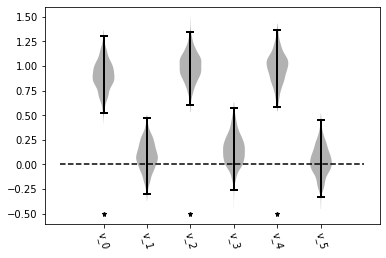

In [197]:
visualize_boot_strap_results(bs_values=stat_rs[0],
                             var_strs=var_strs, alpha=.01)